In [36]:
import pandas as pd
df_fake=pd.read_csv('Fake.csv')
df_fake["label"]=0
#df_fake.drop(["subject","date","title"], axis=1, inplace=True)
df_fake.head(10)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [37]:
df_true=pd.read_csv('True.csv')
df_true["label"]=1
#df_true.drop(["subject","date","title"], axis=1, inplace=True)
df_true.head(10)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [38]:
news=pd.concat([df_fake, df_true])
news[["title", "label"]]

,title,label
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,1
21413,LexisNexis withdrew two products from Chinese ...,1
21414,Minsk cultural hub becomes haven from authorities,1
21415,Vatican upbeat on possibility of Pope Francis ...,1


# NLP in Python-Data cleaning

**Remove Punctuation**

In [39]:
import string
import re

In [40]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
news['title_wo_punct']=news['title'].apply(lambda x: remove_punctuation(x))
news['title_wo_punct'].head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: title_wo_punct, dtype: object

**Created 'data.txt' file of the new column: 'title_wo_punct'**

In [41]:
news.to_csv('data.txt', columns=['title_wo_punct'], sep='\t', index=False)

### Tokenization: Tokenizing is the process of splitting strings into a list of words.

In [42]:
def tokenize(text):
    split=re.split("\W+",text) # Here, “\W+” splits on one or more non-word character
    return split
news['title_wo_punct_split']=news['title_wo_punct'].apply(lambda x: tokenize(x.lower()))
news.head()

,title,text,subject,date,label,title_wo_punct,title_wo_punct_split
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t..."


### Stop words: Stop words are irrelevant words that won’t help in identifying a text as real or fake.

In [44]:
import nltk
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [45]:
def remove_stopwords(text):
    text=[word for word in text if word not in stopword]
    return text
news['title_wo_punct_split_wo_stopwords'] = news['title_wo_punct_split'].apply(lambda x: remove_stopwords(x))
news.head()

,title,text,subject,date,label,title_wo_punct,title_wo_punct_split,title_wo_punct_split_wo_stopwords
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne...","[, donald, trump, sends, embarrassing, new, ye..."
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r..."
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern...","[, sheriff, david, clarke, becomes, internet, ..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba...","[, trump, obsessed, even, obama, name, coded, ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t...","[, pope, francis, called, donald, trump, chris..."


### Lemmatize/ Stem: Stemming and Lemmatizing is the process of reducing a word to its root form.

### Other Steps
- Remove URLs
- 
Remove HTML tag
- 
Remo Emoji
- i
Remove numbers

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split

In [47]:
X = news["text"]
y = news["label"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
cv = CountVectorizer()
X_train = cv.fit_transform(X_train)

In [50]:
X_test = cv.transform(X_test)
X_test

<8980x111659 sparse matrix of type '<class 'numpy.int64'>'
	with 1865547 stored elements in Compressed Sparse Row format>

In [51]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [52]:
type(y_pred)

numpy.ndarray

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

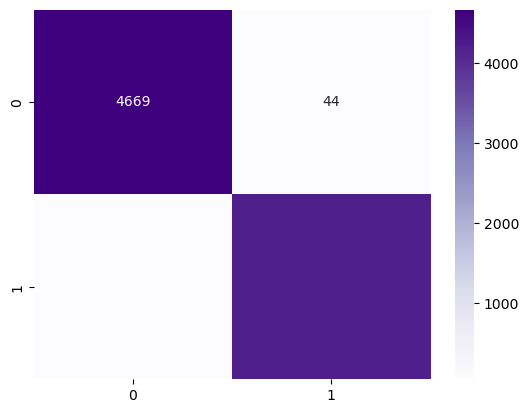

In [54]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Purples", fmt="d")

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4713
           1       0.99      0.99      0.99      4267

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

